# Week 9 - CliffWalking
## Name: Rakshit Ramachandra Ayachit
## Registration No.: 210968045
## Batch: B1
## Section: DSE-A


In [3]:
import gymnasium as gym
import numpy as np

In [4]:
env = gym.make('CliffWalking-v0')

monte_carlo_es implements the Monte Carlo Exploring Starts algorithm to find an optimal policy for a given environment. It iteratively generates episodes using exploring starts strategy,updates the action-value function Q, and then derives the optimal policy from the updated Q values.
It returns the optimal policy, the action-value function Q, and a list containing the total number of steps taken in each episode during the exploration.


In [3]:
def monte_carlo_es(env, n_episodes=500):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    N = np.zeros((env.observation_space.n, env.action_space.n))
    gamma = 1.0
    total_steps = []

    for i in range(n_episodes):
        state = env.reset()
        episode = []
        done = False
        steps = 0

        # generate an episode using exploring starts
        while not done:
            action = np.random.choice(env.action_space.n)
            next_state, reward, done, info = env.step(action)
            episode.append((state, action, reward))
            state = next_state
            steps += 1
        total_steps.append(steps)

        # update Q values using the episode
        returns = 0
        for j in range(len(episode)-1, -1, -1):
            state, action, reward = episode[j]
            returns = gamma*returns + reward
            N[state][action] += 1
            Q[state][action] += (returns - Q[state][action])/N[state][action]

    # derive optimal policy from Q values
    policy = np.argmax(Q, axis=1)

    return policy, Q, total_steps

on_policy_mc_control implements the On-Policy Monte Carlo Control algorithm with Ɛ-greedy policy to find an optimal policy for a given environment. It iteratively generates episodes using an Ɛ-greedy policy, updates the action-value function Q, and then derives the optimal policy from the updated Q values. It returns the optimal policy, the action-value function Q, and a list containing the total number of steps taken in each episode during the exploration.


In [4]:
def on_policy_mc_control(env, n_episodes=500, epsilon=0.1):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    N = np.zeros((env.observation_space.n, env.action_space.n))
    gamma = 1.0
    total_steps = []

    for i in range(n_episodes):
        state = env.reset()
        done = False
        steps = 0

        # generate an episode using Ɛ-soft policy
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, done, info = env.step(action)
            N[state][action] += 1
            Q[state][action] += (reward + gamma*np.max(Q[next_state]) - Q[state][action])/N[state][action]
            state = next_state
            steps += 1
        total_steps.append(steps)

    # derive optimal policy from Q values
    policy = np.argmax(Q, axis=1)

    return policy, Q, total_steps

In [5]:
monte_carlo_es_policy, monte_carlo_es_q, total_steps_es = monte_carlo_es(env)
on_policy_mc_control_policy, on_policy_mc_control_q, total_steps_control = on_policy_mc_control(env)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [6]:
print(str.format('Total Number of Steps taken to reach Optimal Policy using Monte Carlo ES: {}', sum(total_steps_es)))
print(str.format('Total Number of Steps taken to reach Optimal Policy using On-Policy First-Visit MC Control: {}', sum(total_steps_control)))


Total Number of Steps taken to reach Optimal Policy using Monte Carlo ES: 3484417
Total Number of Steps taken to reach Optimal Policy using On-Policy First-Visit MC Control: 18064


In [7]:
print(str.format('Average Number of Steps per Episode taken to reach Optimal Policy using Monte Carlo ES: {}', sum(total_steps_es)/len(total_steps_es)))
print(str.format('Average Number of Steps per Episode taken to reach Optimal Policy using On-Policy First-Visit MC Control: {}', sum(total_steps_control)/len(total_steps_control)))


Average Number of Steps per Episode taken to reach Optimal Policy using Monte Carlo ES: 6968.834
Average Number of Steps per Episode taken to reach Optimal Policy using On-Policy First-Visit MC Control: 36.128


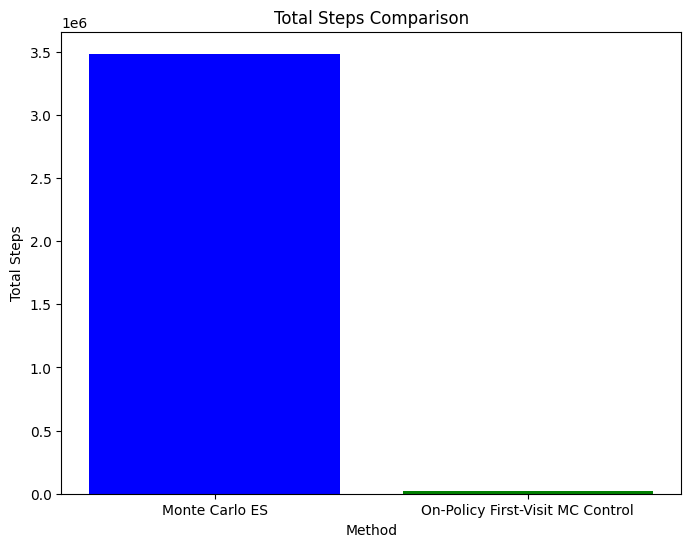

Average Number of Steps per Episode Comparison:
------------------------------------------------
| Method                              | Average Steps per Episode |
------------------------------------------------
| Monte Carlo ES                      |         6968.834          |
| On-Policy First-Visit MC Control    |          36.128           |
------------------------------------------------


In [6]:
import matplotlib.pyplot as plt

# Total steps comparison
labels = ['Monte Carlo ES', 'On-Policy First-Visit MC Control']
total_steps = [3484417, 18064]

plt.figure(figsize=(8, 6))
plt.bar(labels, total_steps, color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Total Steps')
plt.title('Total Steps Comparison')
plt.show()

# Tabular comparison for average steps per episode
methods = ['Monte Carlo ES', 'On-Policy First-Visit MC Control']
average_steps = [6968.834, 36.128]

print("Average Number of Steps per Episode Comparison:")
print("------------------------------------------------")
print("| Method                              | Average Steps per Episode |")
print("------------------------------------------------")
for method, steps in zip(methods, average_steps):
    print(f"| {method:<35} | {steps:^25.3f} |")
print("------------------------------------------------")
